
## MLS Case Study PCA
-----------------------------
## Context:
-----------------------------
In this case study, we will use the Education dataset which contains information on educational institutes in USA. The data has various attributes such as number of applications received, enrollments, faculty education, financial aspects and graduation rate of each institute. 

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to reduce the number of features by using dimensionality reduction techniques like PCA and extract insights. 

-----------------------------
## Dataset: 
-----------------------------

The Education dataset contains information on various colleges in USA. It contains the following information:

- Names: Names of various universities and colleges
- Apps: Number of applications received
- Accept: Number of applications accepted
- Enroll: Number of new students enrolled
- Top10perc: Percentage of new students from top 10% of Higher Secondary class
- Top25perc: Percentage of new students from top 25% of Higher Secondary class
- F_Undergrad: Number of full-time undergraduate students
- P_Undergrad: Number of part-time undergraduate students
- Outstate: Number of students for whom the particular college or university is out-of-state tuition
- Room_Board: Cost of room and board
- Books: Estimated book costs for a student
- Personal: Estimated personal spending for a student
- PhD: Percentage of faculties with a Ph.D.
- Terminal: Percentage of faculties with terminal degree
- S_F_Ratio: Student/faculty ratio
- perc_alumni: Percentage of alumni who donate
- Expend: The instructional expenditure per student
- Grad_Rate: Graduation rate

## Importing libraries and overview of the dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#Importing PCA
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#### Loading data

In [5]:
# data=pd.read_csv("Education_Post_12th_Standard.csv")

data = pd.read_csv("Education_Post_12th_Standard - Education_Post_12th_Standard.csv")


In [6]:
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Target
0,Princeton University,13218,2042,1153,90,98,4540,146,19900,5910,675,1575,91,96,8.4,54,28320,99,1
1,Harvard University,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100,1
2,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1
3,Amherst College,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100,1
4,Brown University,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97,1


In [7]:
data.shape

(777, 19)

#### Check the info of the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
 18  Target       777 non-null    int64  
dtypes: float

In [9]:
# Create target variable
data['Acceptance_rate'] = data['Accept']/data['Apps']
data["Target"] = (data["Acceptance_rate"] < 0.6).astype(int)
data = data.drop('Acceptance_rate',axis=1)
data

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Target
0,Princeton University,13218,2042,1153,90,98,4540,146,19900,5910,675,1575,91,96,8.4,54,28320,99,1
1,Harvard University,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100,1
2,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1
3,Amherst College,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100,1
4,Brown University,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Mayville State University,233,233,153,5,12,658,58,4486,2516,600,1900,68,68,15.7,11,6971,51,0
773,MidAmerica Nazarene College,331,331,225,15,36,1100,166,6840,3720,1100,4913,33,33,15.4,20,5524,49,0
774,Southwest Baptist University,1093,1093,642,12,32,1770,967,7070,2500,400,1000,52,54,15.9,13,4718,71,0
775,University of Wisconsin-Superior,910,910,342,14,53,1434,417,7032,2780,550,1960,75,81,15.2,15,6490,36,0


**Observations:**

- There are 777 observations and 18 columns in the dataset.
- All columns have 777 non-null values i.e. there are no missing values.
- All columns are numeric except the Names column which is of object data type.

## Data Preprocessing and Exploratory Data Analysis

#### Check if all the college names are unique

In [10]:
data.Names.nunique()

777

**Observations:**

- All college names are unique
- As all entries are unique, it would not add value to our analysis. We can drop the Names column. 

In [11]:
#Dropping Names column 
data.drop(columns="Names", inplace=True)

#### Summary Statistics

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F_Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P_Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room_Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


**Observations:**

- On an average, approx 3,000 applications are received in US universities, out of which around 2,000 applications are accepted by the universities and around 780 new students get enrolled.
- The standard deviation is very high for these variables - Apps, Accepted, Enroll which shows the variety of universities and colleges.
- The average cost for room and board, books, and personal expense is approx 4,357, 550, and 1,350 dollars respectively.
- The average number of full time undergrad students are around 3700 whereas the average number of part-time undergrad students stand low at around 850.
- PhD and Grad_Rate have a maximum value of greater than 100 which is not possible as these variables are in percentages. Let's see how many such observations are there in the data.

In [13]:
data[(data.PhD>100) | (data.Grad_Rate>100)]

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,Target
676,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,0
708,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43,0


**There is just one such observation for each variable. We can cap the values to 100%.**

In [14]:
data.loc[582,"PhD"]=100
data.loc[95,"Grad_Rate"]=100

#### Let's check the distribution and outliers for each column in the data

Apps
Skew : 3.72


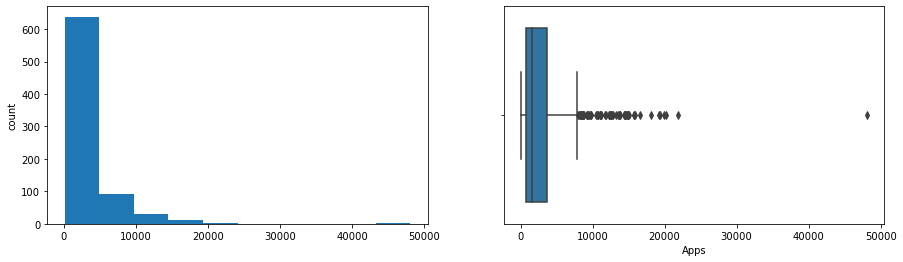

Accept
Skew : 3.42


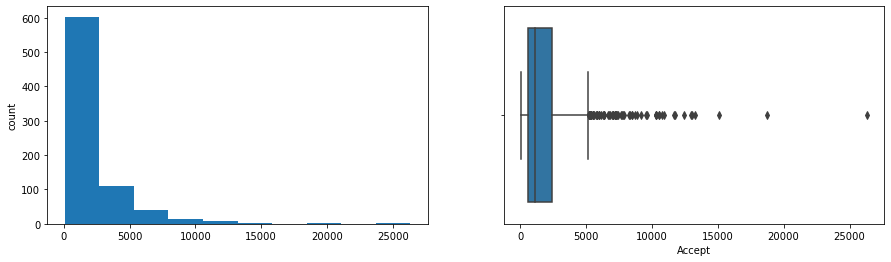

Enroll
Skew : 2.69


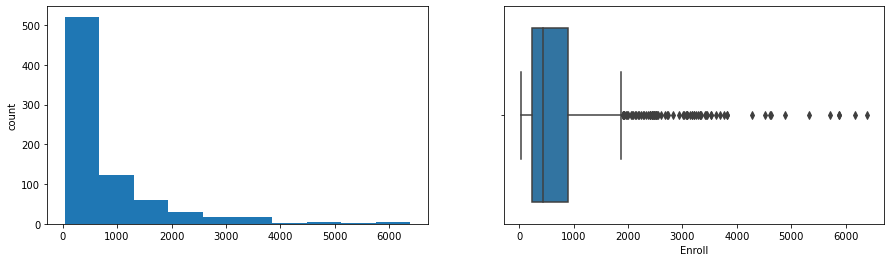

Top10perc
Skew : 1.41


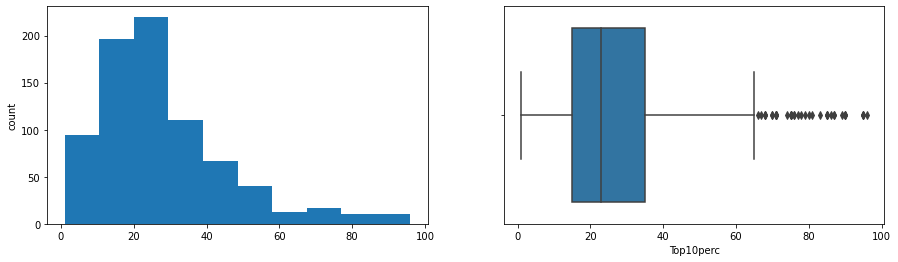

Top25perc
Skew : 0.26


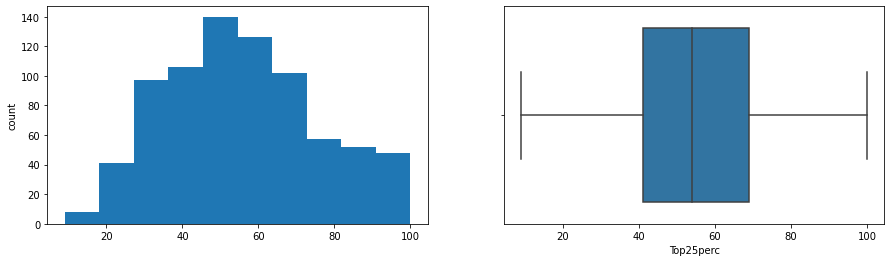

F_Undergrad
Skew : 2.61


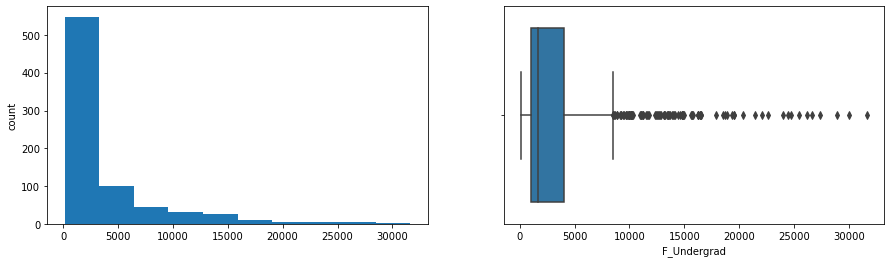

P_Undergrad
Skew : 5.69


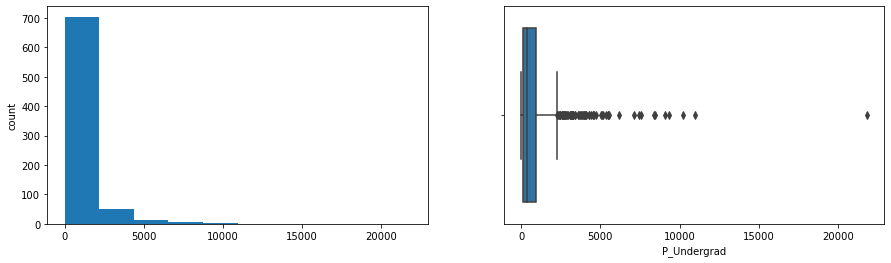

Outstate
Skew : 0.51


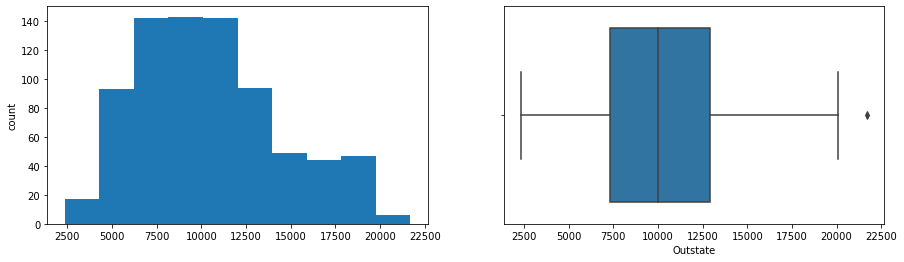

Room_Board
Skew : 0.48


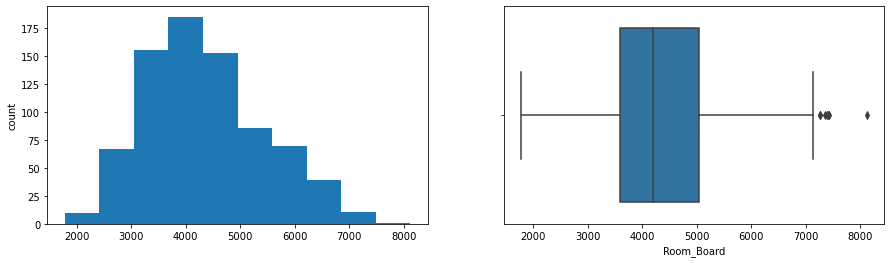

Books
Skew : 3.49


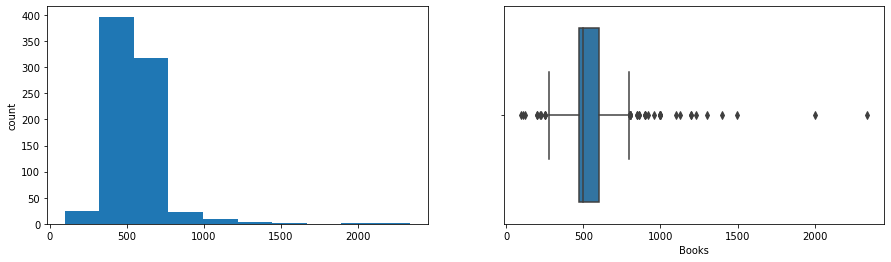

Personal
Skew : 1.74


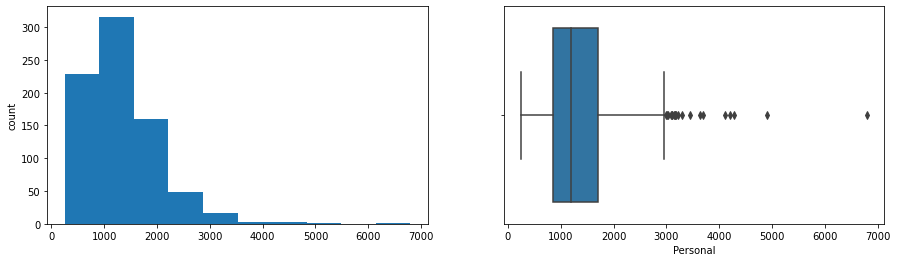

PhD
Skew : -0.76


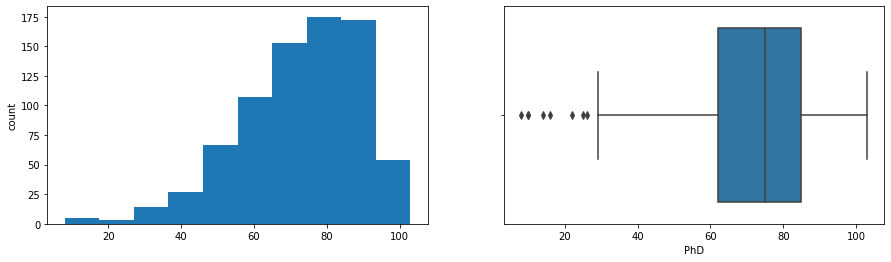

Terminal
Skew : -0.82


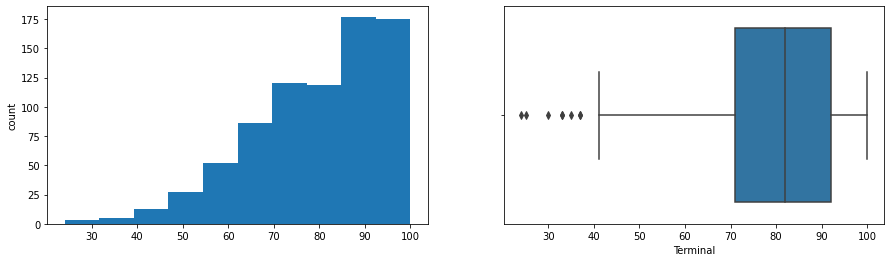

S_F_Ratio
Skew : 0.67


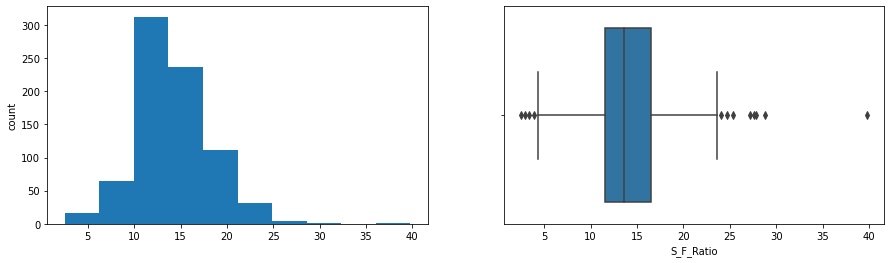

perc_alumni
Skew : 0.61


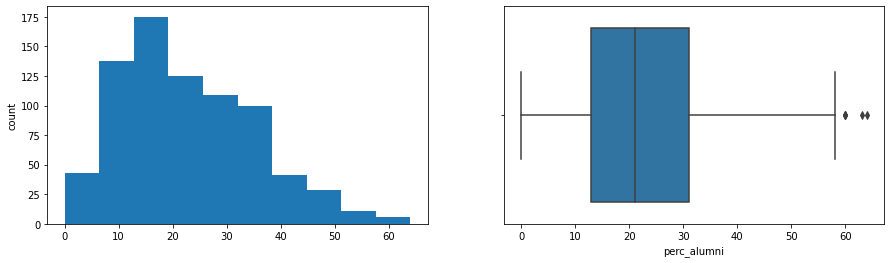

Expend
Skew : 3.46


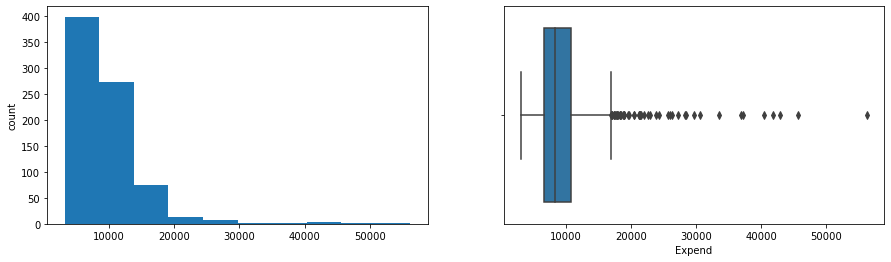

Grad_Rate
Skew : -0.11


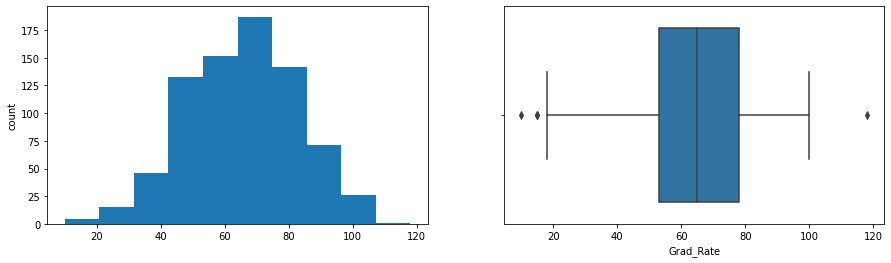

Target
Skew : 1.97


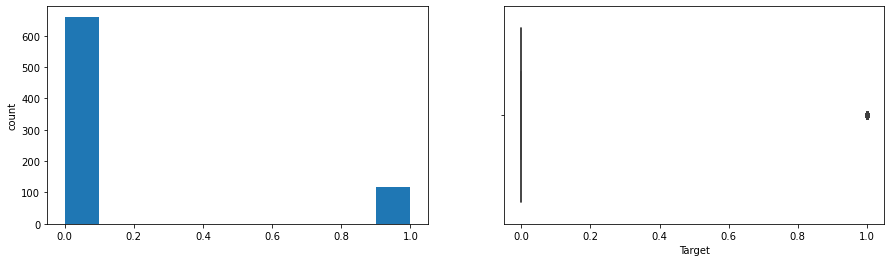

In [15]:
cont_cols = list(data.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**

- The distribution plots show that Apps, Accept, Enroll, Top10perc, F_Undergrad, P_Undergrad, Books, Personal and Expend variables are highly right skewed. It is evident from boxplots that all these variables have outliers.
- Top25percent is the only variable which does not possess outliers.
- Outstate, Room_Board, S_F_Ratio and perc_alumni seems to have a moderate right skew.
- PhD and Terminal are moderately left skewed. 

**Now, let's check the correlation among different variables.**

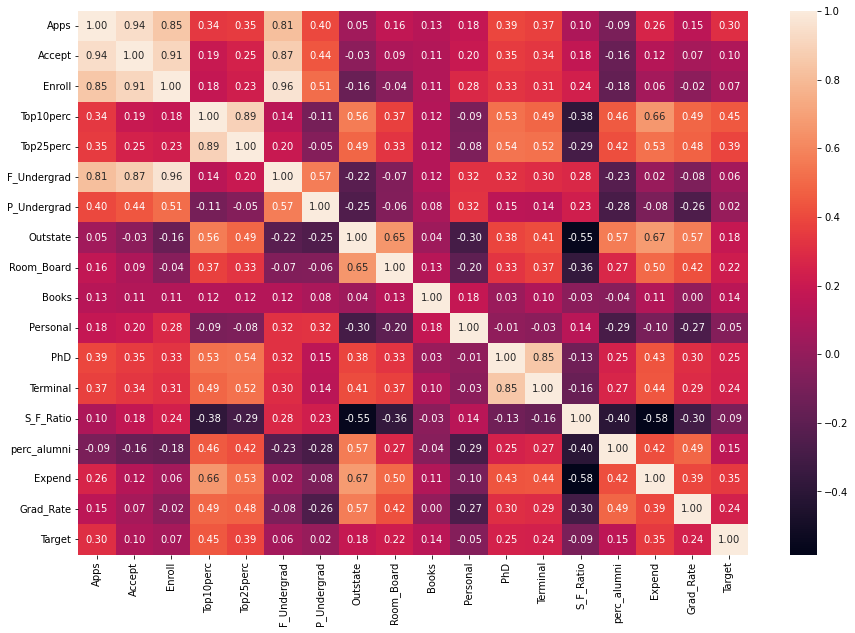

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

**Observations:**

- We can see high positive correlation among the following variables: 
    1. Apps and Accept
    2. Apps and Enroll
    3. Apps and F_Undergrad
    4. Accept and Enroll
    5. Accept and F_Undergrad
    6. Enroll and F_Undergrad
    7. Top10perc and Top25percent
    8. PhD and Terminal
- We can see high negative correlation among the following variables:
    1. S_F_Ratio and Top10perc
    2. S_F_Ratio and Expend

#### Scaling the data

In [17]:
df = data

# Separate the target variable from the features
X = df.drop("Target", axis=1)
y = df["Target"]

# Preprocess the data by standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:

# Define the machine learning models to try
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC())
]

# Fit each model and evaluate it using cross-validation
results = []
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(scores)
    results.append((name, np.mean(scores), np.std(scores)))


[0.92063492 0.93548387 0.87096774 0.90322581 0.90322581 0.9516129
 0.90322581 0.91935484 0.93548387 0.93548387]
[0.84126984 0.88709677 0.79032258 0.88709677 0.88709677 0.83870968
 0.83870968 0.79032258 0.83870968 0.85483871]
[0.93650794 0.91935484 0.85483871 0.9516129  0.90322581 0.88709677
 0.90322581 0.90322581 0.90322581 0.87096774]
[0.93650794 0.90322581 0.85483871 0.9516129  0.90322581 0.85483871
 0.87096774 0.90322581 0.91935484 0.87096774]


In [19]:
    
# Print the cross-validation results
for name, mean_score, std_score in results:
    print(f"{name}: {mean_score:.3f} +/- {std_score:.3f}")


Logistic Regression: 0.918 +/- 0.022
Decision Tree: 0.845 +/- 0.034
Random Forest: 0.903 +/- 0.027
Support Vector Machine: 0.897 +/- 0.032


In [20]:

# Select the best model based on the cross-validation score
best_model_name, best_model_score, _ = max(results, key=lambda x: x[1])
best_model = dict(models)[best_model_name]
print(f"Best model: {best_model_name} ({best_model_score:.3f} CV score)")

# Train the best model on the full training set and evaluate it on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.3f}")


Best model: Logistic Regression (0.918 CV score)
Test accuracy: 0.923


In [21]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:")
    print(cm)

# Train the best model on the full training set and evaluate it on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.3f}")

# Print the confusion matrix for the best model on the test data
print_confusion_matrix(best_model, X_test, y_test)


Test accuracy: 0.923
Confusion matrix:
[[129   1]
 [ 11  15]]


In [22]:
# df= data

# # Separate the features and target variables
# # Separate the target variable from the features
X = df.drop("Target", axis=1)
y = df["Target"]



In [23]:

# Apply LDA to the feature data
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)


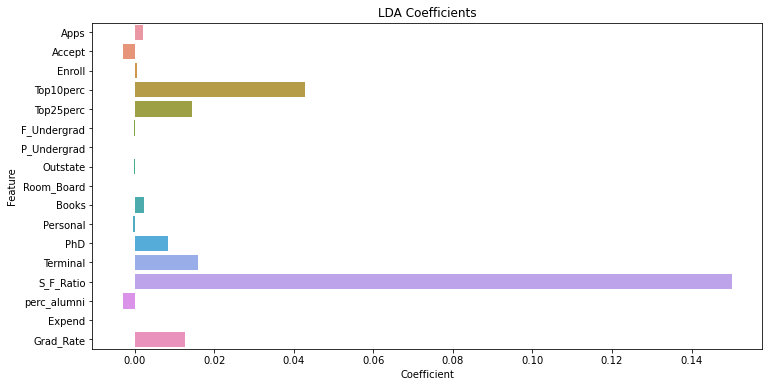

In [24]:
# Plot the LDA coefficients


plt.figure(figsize=(12, 6))
sns.barplot(x=lda.coef_[0], y=X.columns)
plt.title("LDA Coefficients")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()


In [25]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)



In [26]:

# Define the machine learning models to try
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC())
]

# Fit each model and evaluate it using cross-validation
results = []
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(scores)
    results.append((name, np.mean(scores), np.std(scores)))


[0.96825397 0.93548387 0.88709677 0.9516129  0.91935484 0.98387097
 0.93548387 0.93548387 0.93548387 0.9516129 ]
[0.88888889 0.90322581 0.90322581 0.9516129  0.93548387 0.90322581
 0.85483871 0.90322581 0.88709677 0.90322581]
[0.88888889 0.90322581 0.90322581 0.9516129  0.93548387 0.90322581
 0.85483871 0.88709677 0.88709677 0.90322581]
[0.93650794 0.93548387 0.87096774 0.93548387 0.90322581 0.98387097
 0.93548387 0.91935484 0.93548387 0.9516129 ]


In [27]:
    
# Print the cross-validation results
for name, mean_score, std_score in results:
    print(f"{name}: {mean_score:.3f} +/- {std_score:.3f}")


Logistic Regression: 0.940 +/- 0.025
Decision Tree: 0.903 +/- 0.025
Random Forest: 0.902 +/- 0.025
Support Vector Machine: 0.931 +/- 0.028


In [28]:

# Select the best model based on the cross-validation score
best_model_name, best_model_score, _ = max(results, key=lambda x: x[1])
best_model = dict(models)[best_model_name]
print(f"Best model: {best_model_name} ({best_model_score:.3f} CV score)")

# Train the best model on the full training set and evaluate it on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.3f}")


Best model: Logistic Regression (0.940 CV score)
Test accuracy: 0.936


In [29]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:")
    print(cm)

# Train the best model on the full training set and evaluate it on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.3f}")

# Print the confusion matrix for the best model on the test data
print_confusion_matrix(best_model, X_test, y_test)


Test accuracy: 0.936
Confusion matrix:
[[129   1]
 [  9  17]]
